Exercise 1

In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from numba import jit, njit, prange
%matplotlib inline

In [3]:


class KernelEstimator:
    def __init__(self, x_arr, h, n=100):
        self.data = x_arr
        self.data.sort()
        self.bandwidth = h
        self.size = n
        #self.sigma = np.sqrt(np.var(self.data))
        
    @njit
    def f(self, x):
        temp = 0
        for i in range(self.size):
            temp = temp + norm.pdf((x - self.data[i])/float(self.bandwidth))
        temp = temp / float(self.bandwidth) / float(self.size)
        return temp
        
    @njit
    def getEstimate(self):
        #we use a normal distribution as kernel function
        domain = np.linspace(self.data[0], self.data[-1], 100)
        image = np.empty_like(domain)
        for i in range(len(domain)):
            image[i] = self.f(domain[i])
            
        return domain, image
        
        
    
    
    

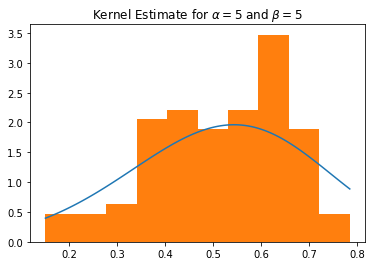

In [78]:
x_arr_1 = np.random.beta(5,5,100)
h_1 = 1.06 * np.sqrt(np.var(x_arr_1))
KE1 = KernelEstimator(x_arr_1, h_1)
domain1, image1 = KE1.getEstimate()
plt.plot(domain1, image1 , label = "Estimator")
plt.hist(x_arr_1, normed = True, label = "Sample distribution")
plt.title(r"Kernel Estimate for $\alpha = 5$ and $\beta = 5$")
plt.show()

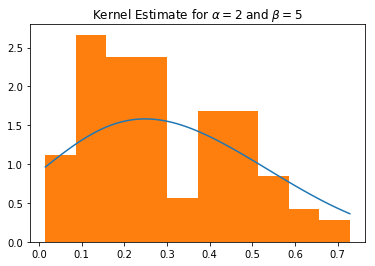

In [79]:
x_arr_2 = np.random.beta(2,5,100)
h_2 = 1.06 * np.sqrt(np.var(x_arr_2))
KE2 = KernelEstimator(x_arr_2, h_2)
domain2, image2 = KE2.getEstimate()
plt.plot(domain2, image2 , label = "Estimator")
plt.hist(x_arr_2, normed = True, label = "Sample distribution")
plt.title(r"Kernel Estimate for $\alpha = 2$ and $\beta = 5$")
plt.show()

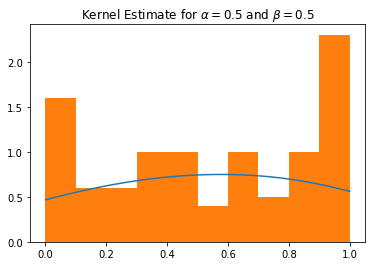

In [80]:
x_arr_3 = np.random.beta(.5,.5,100)
h_3 = 1.06 * np.sqrt(np.var(x_arr_3))
KE3 = KernelEstimator(x_arr_3, h_3)
domain3, image3 = KE3.getEstimate()
plt.plot(domain3, image3 , label = "Estimator")
plt.hist(x_arr_3, normed = True, label = "Sample distribution")
plt.title(r"Kernel Estimate for $\alpha = 0.5$ and $\beta = 0.5$")
plt.show()

In [81]:
print("It works well when aphal and beta are large. When alpha and beta are both small, the performance is bad.")

It works well when aphal and beta are large. When alpha and beta are both small, the performance is bad.


Problem 2

In [82]:
rho = 0.9
b = 0.0
sigma = 0.1
mu = -3.0
s = 0.2



In [87]:
def problem_2(n):
    #Generate $n$ draws of $X_t$ from the $N(\mu, s^2)$ distribution
    samples = np.random.normal(loc = mu, scale = s, size = n)
    
    #Update them all using the rule $X_{t+1} = \rho X_t + b + \sigma \xi_{t+1}$
    samples_prime = np.empty_like(samples)
    for i in range(len(samples)):
        samples_prime[i] = samples[i] * rho + b + sigma * get_xi()
        
    
    h = 1.06 * np.sqrt(np.var(samples_prime)) 
    ke = KernelEstimator(samples_prime, h)
    do, im = ke.getEstimate()
    plt.plot(do, im, label = "Approximation")
    #plt.ylim(-0.2,4.2)
    tit="Approximation, n =" + str(n)
    plt.title(tit)
    x_sample = np.linspace(-3.5, -2, 100)
    plt.plot(x_sample, mlab.normpdf(x_sample, rho * mu + b, np.sqrt((rho**2)*(s**2)+(sigma**2))), label = r"$\psi_{t+1}$")
    plt.legend()
    #return do, im

    
def get_xi():
    return np.random.normal()


    
    

Text(0.5,1,'True distribution of $\\psi_{t}$ and $\\psi_{t+1}$')

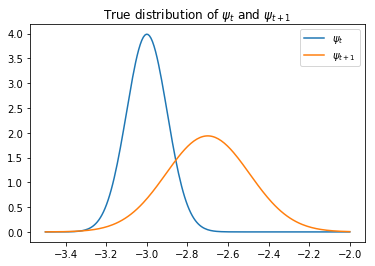

In [88]:
#plot $\psi_t$ and $\psi_{t+1}$ using the true distributions described above.

x_sample = np.linspace(-3.5, -2, 200)
plt.plot(x_sample, mlab.normpdf(x_sample, mu, sigma), label = r"$\psi_t$")
plt.plot(x_sample, mlab.normpdf(x_sample, rho * mu + b, np.sqrt((rho**2)*(s**2)+(sigma**2))), label = r"$\psi_{t+1}$")
plt.legend()
plt.title(r"True distribution of $\psi_{t}$ and $\psi_{t+1}$")
#psi_t_sample = np.random.normal(loc = mu, scale = s, size = 1000)
#psi_t_1_sample = np.random.normal(loc = rho * mu + b, scale = np.sqrt((rho**2)*(s**2)+(sigma**2)), size = 1000)



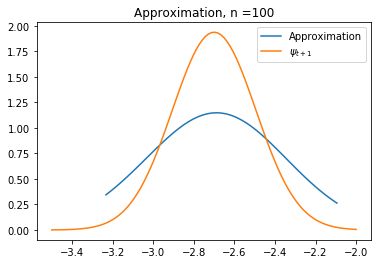

In [89]:
problem_2(100)

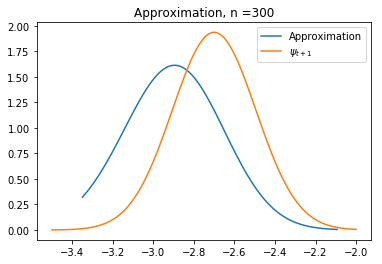

In [90]:
problem_2(300)

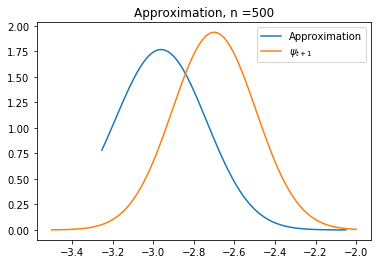

In [91]:
problem_2(500)

In [94]:
print("yes it is converging")

yes it is converging


Problem 3

By Gelfand's Formula, we know that $$\lim_{k\to\infty}  |{A^k}|^{\frac{1}{k}} = r(A) < 1.$$
Hence, it follows that $$\lim_{k\to\infty}  |{A^k}| = r(A) ^k = 0.$$